<a href="https://colab.research.google.com/github/LesNEIGE/r_stastics/blob/master/16regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [ ]:
# A회사 광고비 지출이 매출에 어느정도 영향 미치는지 파악.
# 아울러 회귀분석 통해 광고비 증가시(30) 매출액은 얼마나 증가할지 예상.

# R에서 선형회귀는 1m, predict 함수를 사용
# lm(종속 ~ 독립)


In [1]:
ad = c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales = c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

In [5]:
lm(sales~ad)
# 절편 : 62.93, 기울기 : 2.19
# y = 62.93 + 2.19*x

# 광고비 30 투입시 매출액은?
# 62.93 + 2.19*30 


Call:
lm(formula = sales ~ ad)

Coefficients:
(Intercept)           ad  
     62.929        2.186  


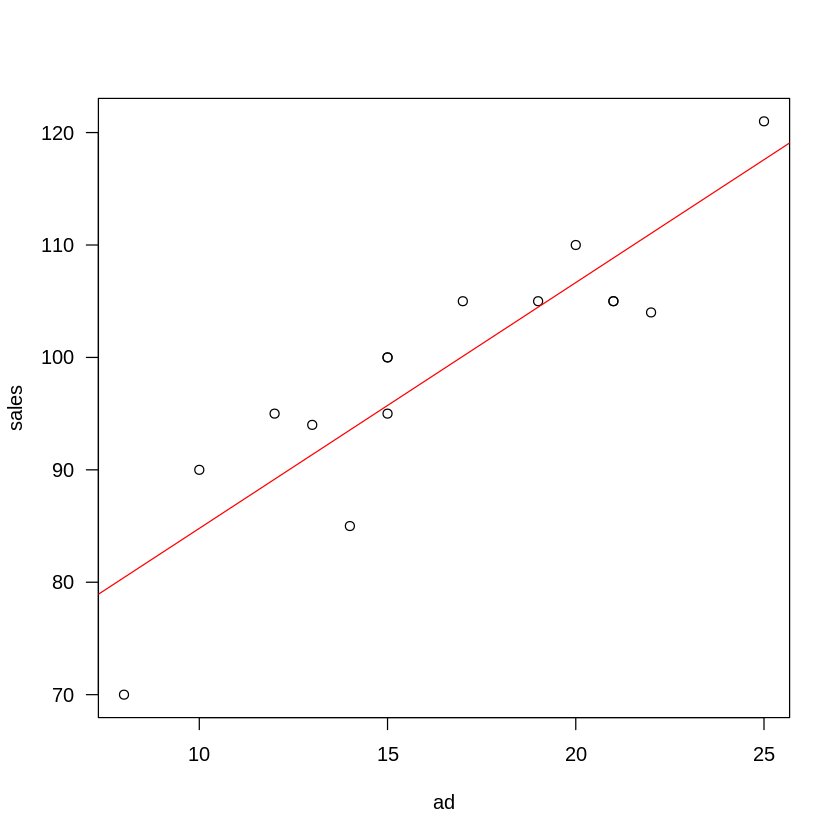

In [7]:
# 회귀모델 시각화
plot(ad, sales, las = 1)
abline(lm(sales~ad), col = 'red')